### The Dataset

We have 100 handpicked images of spoons in 3 different materials, plastic, metal, and wood. The images are taken by phone and has different background, lighting, image size, and angle.

We will use the dataset to train a model to detect the material of the spoon.



#### Load the dataset

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

# train_datagen = ImageDataGenerator(rescale=1./255, rotation=40, width_shift=0.2, height_shift=0.2, shear=0.2, zoom=0.2, horizontal_flip=True,)
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     directory = 'data/train',
#     target_size=(256,256),
#     batch_size=16,
#     class_mode='categorical',
# )

# validation_generator = train_datagen.flow_from_directory(
#     directory = 'data/valid',
#     target_size=(256,256),
#     batch_size=16,
#     class_mode='categorical',
# )

# test_generator = test_datagen.flow_from_directory(
#     directory = 'data/test',
#     target_size=(256,256),
#     batch_size=16,
#     class_mode='categorical',
# )


#### Build the data model

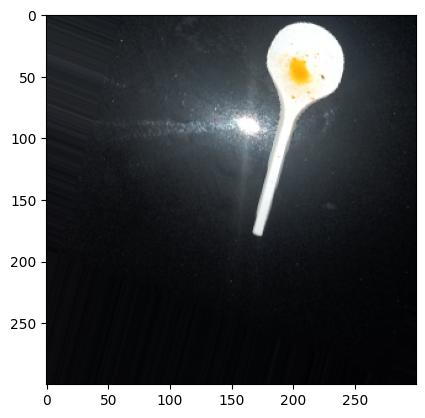

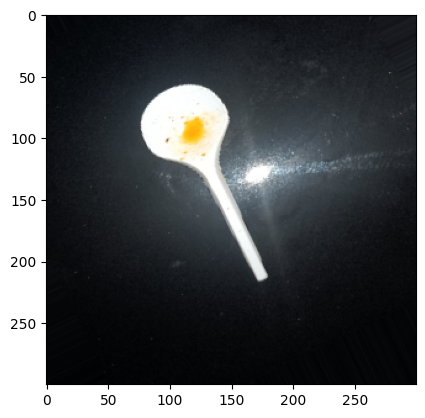

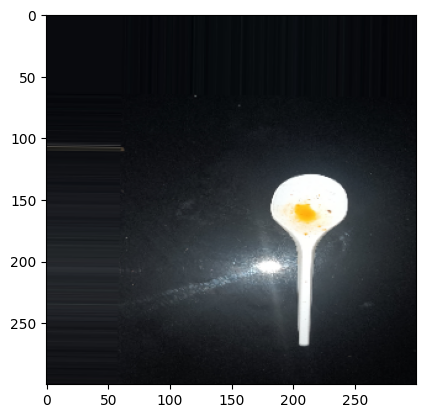

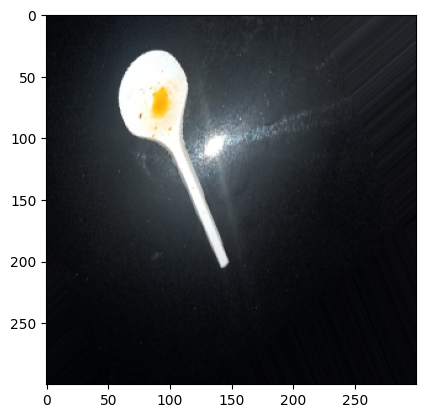

In [2]:
from tensorflow.keras.preprocessing import image as image_utils

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
vertical_flip=False,
fill_mode = 'nearest',
)

image = image_utils.load_img('data/train/plastic/IMG20221208051104.jpg', color_mode="rgb", target_size=(300,300))
x = image_utils.img_to_array(image)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image_utils.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
        break

plt.show()
    

#### Perform data augmentation to improve the model

In [3]:
from keras.models import Sequential
from keras import layers

# model = Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(3, activation='softmax'))

model = tf.keras.Sequential([
    # Convolutional layers
    tf.keras.layers.Conv2D(32, 1, activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(64, 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(512, 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # Flatten the output and add a fully connected layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # Add an output layer with the desired number of classes
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, fill_mode = 'nearest',)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('data/train', target_size=(256,256), batch_size=32, class_mode= 'categorical')
validation_generator = test_datagen.flow_from_directory('data/valid', target_size=(256,256), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('data/test', target_size=(256,256), batch_size=32, class_mode='categorical')
history = model.fit_generator(train_generator, epochs=40, validation_data=validation_generator)

Found 119 images belonging to 3 classes.
Found 21 images belonging to 3 classes.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14976\2883434223.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=40, validation_data=validation_generator)


Epoch 1/40
4/4 [==============================] - 23s 6s/step - loss: 1.3598 - accuracy: 0.6555 - val_loss: 0.4234 - val_accuracy: 0.7619
Epoch 2/40
4/4 [==============================] - 20s 5s/step - loss: 0.4151 - accuracy: 0.7479 - val_loss: 0.3682 - val_accuracy: 0.8571
Epoch 3/40
4/4 [==============================] - 20s 5s/step - loss: 0.3508 - accuracy: 0.8067 - val_loss: 0.3711 - val_accuracy: 0.7619
Epoch 4/40
4/4 [==============================] - 20s 5s/step - loss: 0.2879 - accuracy: 0.8655 - val_loss: 0.3608 - val_accuracy: 0.8095
Epoch 5/40
4/4 [==============================] - 20s 5s/step - loss: 0.2324 - accuracy: 0.8739 - val_loss: 0.3416 - val_accuracy: 0.7619
Epoch 6/40
4/4 [==============================] - 20s 5s/step - loss: 0.3350 - accuracy: 0.8235 - val_loss: 0.2493 - val_accuracy: 0.8571
Epoch 7/40
4/4 [==============================] - 19s 4s/step - loss: 0.2715 - accuracy: 0.8487 - val_loss: 0.2229 - val_accuracy: 0.8571
Epoch 8/40
4/4 [==================

#### compile the model

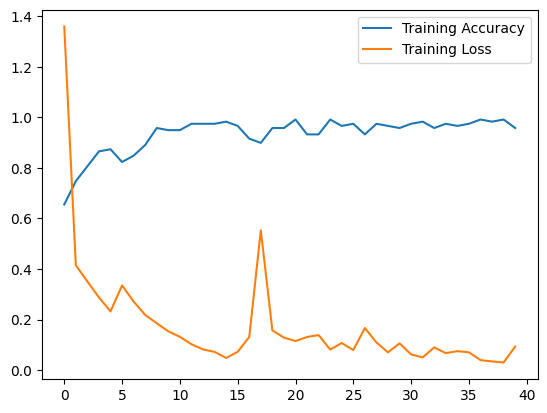

In [5]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(acc, label='Training Accuracy')
plt.plot(loss, label='Training Loss')
plt.legend()
plt.show()

#### Train the model

In [6]:
model.save('model_materialdetection_fifthiteration.h5')

In [8]:
test_generator = test_datagen.flow_from_directory('data/test', target_size=(256,256), batch_size=32, class_mode='categorical')

model.evaluate(test_generator)

Found 6 images belonging to 3 classes.
1/1 [==============================] - 0s 415ms/step - loss: 0.0209 - accuracy: 1.0000


[0.02085624448955059, 1.0]

(256, 256, 3)
1/1 [==============================] - 0s 149ms/step
[[2.4071978e-06 9.9999595e-01 1.6911766e-06]]
Plastic, certainty 100.0 %


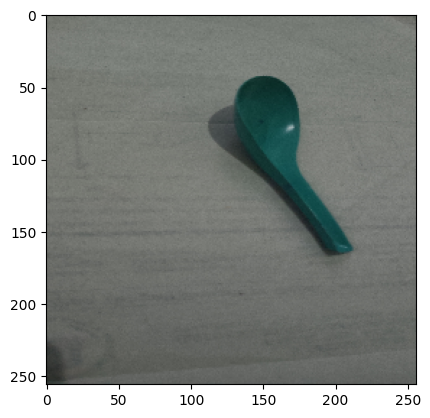

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

loaded_model = tf.keras.models.load_model('model_materialdetection_fifthiteration.h5')
img = tf.keras.preprocessing.image.load_img('sendok.jpg', target_size=(256, 256,3))
img = tf.keras.preprocessing.image.img_to_array(img)
img = img / 255.0
print(img.shape)
plt.imshow(img)

prediction = loaded_model.predict(np.array([img]))
print(prediction)
finalresult = np.argmax(prediction[0])
if finalresult == 0:
    print(f"Metal, certainty {round((prediction[0][0] * 100),3)} %")
elif finalresult == 1:
    print(f"Plastic, certainty {round((prediction[0][1] * 100),3)} %")
elif finalresult == 2:
    print(f"Wood, certainty {round((prediction[0][2] * 100),3)} %")
